# Modelo A

Autor: Daniel Triviño

# Setup del cuaderno

In [31]:
import pandas as pd
from ydata_profiling import ProfileReport
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib

# import word tokenize
from nltk.tokenize import word_tokenize
import nltk
import numpy as np
from sklearn.feature_extraction.text import (
    TfidfVectorizer,
    CountVectorizer,
    HashingVectorizer,
)

nltk.download("punkt_tab")
import spacy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import joblib
from collections import Counter
from sklearn.model_selection import KFold

# Load the large spanish model
nlp = spacy.load("es_core_news_lg")
# nlp = spacy.load('es_dep_news_trf')
%matplotlib inline

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# Entendimiento de los datos

In [ ]:
df_original = pd.read_csv('C:/Users/danie/Projects/BI_PROY1_2402/Proyecto 1/Etapa 1/Datasets/ODScat_345.csv', encoding='utf-8')
df_test_original = pd.read_excel('C:/Users/danie/Projects/BI_PROY1_2402/Proyecto 1/Etapa 1/Datasets/TestODScat_345.xlsx')



In [ ]:
df_original

,Textos_espanol,sdg
0,"Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3
3,"Por ejemplo, el estado australiano de Victoria creó una agencia de promoción de la salud financiada con los impuestos sobre el tabaco, y varios estados de EE.UU. (California, Massachusetts, Arizona y Oregón) han destinado parte de los ingresos procedentes de los impuestos especiales sobre el tabaco a actividades de educación y control del tabaco, mientras que en Nueva Jersey, Ohio y Texas los ingresos procedentes del alcohol se utilizan para programas de educación y prevención relacionados con el alcohol (Sassi et al., 2004), Los impuestos locales pueden ser una fuente importante de ingresos, sobre todo en los sistemas sanitarios descentralizados (por ejemplo, Dinamarca, Finlandia, Italia y Suecia)17 . Además, el nivel de los impuestos locales puede fijarse en función de las preferencias locales sobre el nivel y la calidad de los servicios médicos. Sin embargo, en ausencia de un mecanismo de transferencia ajustado al riesgo y gestionado centralmente, la descentralización reduce la mancomunación de riesgos y podría dar lugar a mayores disparidades sanitarias interregionales.",3
4,"El consumo anual de alcohol se estima en 15,7 litros al año para los hombres, más de un 50% por encima de la media de la OCDE (10,4) (Sistema mundial de información sobre alcohol y salud de la OMS), lo que puede ayudar a explicar la

## Calidad de los datos

Dimensiones de calidad de los datos:
+ Consistencia
+ Validez
+ Completitud
+ Unicidad

### Completitud

Bajo una inspección sencilla, parece no haber problemas de completitud en los datos

In [ ]:
df_original['sdg'].value_counts()

sdg
5    1451
4    1354
3    1244
Name: count, dtype: int64

In [ ]:
# strip all values in the column
df_original['Textos_espanol'] = df_original['Textos_espanol'].str.strip()
# count all values in the column where the value is an empty string

df_original['Textos_espanol'].isnull().sum()

0

### Validez

Se identifican los siguietnes problemas de validez:
+ Hay un problema de codificación de los textos en el dataset, pues muchos caracteres que corresponden a vocales con tilde han sido reemplazados por caracteres no válidos.

In [ ]:
def fix_encoding(text):
    replacements = {
        'Ã¡': 'á',
        'Ã©': 'é',
        'Ã­': 'í',
        'Ã³': 'ó',
        'Ãº': 'ú',
        'Ã±': 'ñ'
    }
    
    for wrong, correct in replacements.items():
        text = text.replace(wrong, correct)
    
    return text

df_original['Textos_espanol'] = df_original['Textos_espanol'].apply(fix_encoding)

In [ ]:
df_original.head(5)

,Textos_espanol,sdg
0,"Por ejemplo, el número de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparación con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la población ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El número de recetas que no pudieron ser surtidas en su totalidad por un farmacéutico debido a la falta de existencias es de 33% dentro del SP en comparación con 14% dentro del IMSS según los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas más altas de recetas surtidas). Ambas cifras se encuentran entre las más altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3
3,"Por ejemplo, el estado australiano de Victoria creó una agencia de promoción de la salud financiada con los impuestos sobre el tabaco, y varios estados de EE.UU. (California, Massachusetts, Arizona y Oregón) han destinado parte de los ingresos procedentes de los impuestos especiales sobre el tabaco a actividades de educación y control del tabaco, mientras que en Nueva Jersey, Ohio y Texas los ingresos procedentes del alcohol se utilizan para programas de educación y prevención relacionados con el alcohol (Sassi et al., 2004), Los impuestos locales pueden ser una fuente importante de ingresos, sobre todo en los sistemas sanitarios descentralizados (por ejemplo, Dinamarca, Finlandia, Italia y Suecia)17 . Además, el nivel de los impuestos locales puede fijarse en función de las preferencias locales sobre el nivel y la calidad de los servicios médicos. Sin embargo, en ausencia de un mecanismo de transferencia ajustado al riesgo y gestionado centralmente, la descentralización reduce la mancomunación de riesgos y podría dar lugar a mayores disparidades sanitarias interregionales.",3
4,"El consumo anual de alcohol se estima en 15,7 litros al año para los hombres, más de un 50% por encima de la media de la OCDE (10,4) (Sistema mundial de información sobre alcohol y salud de la OMS), lo que puede ayudar a explicar la alta mor

### Consistencia

Algunas de las entradas de texto del dataset están rodeadas por comillas dobles, aunque no todas. Es posible que esto no introduzca problemas en el dataset. 

### Unicidad

En primera instancia, el dataset no tiene columnas que deban ser únicas siguiento algúna restricción de negocio. Bajo una inspección sencilla, parece no haber filas totalmente duplicadas.

In [ ]:
df_original.duplicated().sum()

0

## Perfilamiento de los datos

Se aprovecha el paquete ydata-profiling para hacer un perfilamiento detallado del dataset. A partir de este reporte se destacan las siguientes conclusiones:
+ Variables: 2
+ Observaciones: 4049

|Variable|Tipo|
|--|--|
|Textos_espanol|Text|
|sdg|Categórica|

+ Se observa con ayuda del wordcloud que las palabras mas frecuentes en el dataset son stopwords que podrían ser eliminadas en el paso de procesamiento de datos. 


In [ ]:
profile = ProfileReport(df_original, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Preparación de datos

In [ ]:
df_limpieza = df_original.copy(deep=True)
def word_tokenize_spanish(text):
    return word_tokenize(text, language='spanish')
df_limpieza['words'] = df_limpieza['Textos_espanol'].apply(word_tokenize_spanish)
df_limpieza.head(5)

,Textos_espanol,sdg,words
0,"Por ejemplo, el número de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparación con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la población ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El número de recetas que no pudieron ser surtidas en su totalidad por un farmacéutico debido a la falta de existencias es de 33% dentro del SP en comparación con 14% dentro del IMSS según los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas más altas de recetas surtidas). Ambas cifras se encuentran entre las más altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3,"[Por, ejemplo, ,, el, número, de, consultas, externas, de, especialistas, es, de, 319, por, cada, mil, derechohabientes, en, el, SP, ,, en, comparación, con, 338, y, 620, por, cada, mil, derechohabientes, en, el, IMSS, y, el, ISSSTE, ,, respectivamente, ., Si, bien, algunas, de, estas, diferencias, pueden, reflejar, una, necesidad, desigual, (, como, la, población, ligeramente, mayor, del, ISSSTE, ), ,, otras, no, pueden, justificarse, de, esta, manera, ., El, número, de, recetas, que, no, pudieron, ser, surtidas, en, su, totalidad, por, un, farmacéutico, debido, a, la, falta, de, existencias, es, de, 33, %, dentro, del, SP, en, comparación, con, ...]"
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3,"[En, 2007, ,, el, gobierno, central, financió, directamente, solo, el, 0,3, %, del, gasto, total, en, salud, ,, pero, realizó, transferencias, específicas, para, el, gasto, en, salud, que, ascendieron, a, otro, 5,6, %, del, gasto, total, ., La, mayor, parte, del, gasto, presupuestario, en, salud, lo, realizan, los, gobiernos, de, los, condados, ., Por, lo, tanto, ,, los, condados, pobres, solo, pueden, ofrecer, un, bajo, nivel, de, atención, a, la, población, local, ., El, gobierno, provincial, proporciona, subsidios, del, lado, de, la, oferta, a, los, hospitales, .]"
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3,"[Claramente, ,, hay, muchos, otros, factores, en, juego, ,, en, particular, ,, una, variedad, de

In [ ]:
def to_lower(words: list[str]):
    return [word.lower() for word in words]

def remove_punctuation(words: list[str]):
    return [word for word in words if word.isalpha()]

def remove_stopwords(words: list[str]):
    stopwords = set(nltk.corpus.stopwords.words('spanish'))
    return [word for word in words if word not in stopwords]

def preprocessing(words: list[str]):
    words = to_lower(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    return words

In [ ]:
df_limpieza['words'] = df_limpieza['words'].apply(preprocessing)
df_limpieza.head(5)

,Textos_espanol,sdg,words
0,"Por ejemplo, el número de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparación con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la población ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El número de recetas que no pudieron ser surtidas en su totalidad por un farmacéutico debido a la falta de existencias es de 33% dentro del SP en comparación con 14% dentro del IMSS según los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas más altas de recetas surtidas). Ambas cifras se encuentran entre las más altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3,"[ejemplo, número, consultas, externas, especialistas, cada, mil, derechohabientes, sp, comparación, cada, mil, derechohabientes, imss, issste, respectivamente, si, bien, diferencias, pueden, reflejar, necesidad, desigual, población, ligeramente, mayor, issste, pueden, justificarse, manera, número, recetas, pudieron, ser, surtidas, totalidad, farmacéutico, debido, falta, existencias, dentro, sp, comparación, dentro, imss, según, datos, encuesta, aunque, propias, cifras, institutos, ss, sugieren, tasas, altas, recetas, surtidas, ambas, cifras, encuentran, altas, ocde, gasto, bolsillo, reducido, significativamente, última, década, pesar, esfuerzos, lograr, cobertura, sanitaria, universal, través, reforma, sp]"
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3,"[gobierno, central, financió, directamente, solo, gasto, total, salud, realizó, transferencias, específicas, gasto, salud, ascendieron, gasto, total, mayor, parte, gasto, presupuestario, salud, realizan, gobiernos, condados, condados, pobres, solo, pueden, ofrecer, bajo, nivel, atención, población, local, gobierno, provincial, proporciona, subsidios, lado, oferta, hospitales]"
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3,"[claramente, factores, juego, particular, variedad, barreras, determinantes, sociales, pueden, relacionados, género, clase, etnia, casta, idioma, religión, surgen, estructuras, normas, procesos, sociales, arraigados, aceptan, incluso, 

In [ ]:
df_limpieza.head(5)

,Textos_espanol,sdg,words
0,"Por ejemplo, el número de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparación con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la población ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El número de recetas que no pudieron ser surtidas en su totalidad por un farmacéutico debido a la falta de existencias es de 33% dentro del SP en comparación con 14% dentro del IMSS según los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas más altas de recetas surtidas). Ambas cifras se encuentran entre las más altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3,"[ejemplo, número, consultas, externas, especialistas, cada, mil, derechohabientes, sp, comparación, cada, mil, derechohabientes, imss, issste, respectivamente, si, bien, diferencias, pueden, reflejar, necesidad, desigual, población, ligeramente, mayor, issste, pueden, justificarse, manera, número, recetas, pudieron, ser, surtidas, totalidad, farmacéutico, debido, falta, existencias, dentro, sp, comparación, dentro, imss, según, datos, encuesta, aunque, propias, cifras, institutos, ss, sugieren, tasas, altas, recetas, surtidas, ambas, cifras, encuentran, altas, ocde, gasto, bolsillo, reducido, significativamente, última, década, pesar, esfuerzos, lograr, cobertura, sanitaria, universal, través, reforma, sp]"
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3,"[gobierno, central, financió, directamente, solo, gasto, total, salud, realizó, transferencias, específicas, gasto, salud, ascendieron, gasto, total, mayor, parte, gasto, presupuestario, salud, realizan, gobiernos, condados, condados, pobres, solo, pueden, ofrecer, bajo, nivel, atención, población, local, gobierno, provincial, proporciona, subsidios, lado, oferta, hospitales]"
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3,"[claramente, factores, juego, particular, variedad, barreras, determinantes, sociales, pueden, relacionados, género, clase, etnia, casta, idioma, religión, surgen, estructuras, normas, procesos, sociales, arraigados, aceptan, incluso, 

In [ ]:
# word cloud
text = ''
for word_list in df_limpieza['words']:
    text += ' '.join(word_list) + ' '

# text = 'monda'

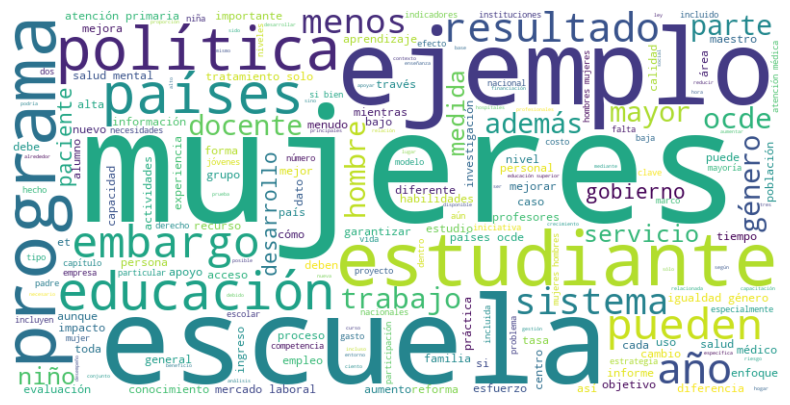

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
def lemmatize(words):
    text = ' '.join(words)
    doc = nlp(text)
    return [token.lemma_ for token in doc]

def stem(words):
    stemmer = nltk.stem.SnowballStemmer('spanish')
    words = [stemmer.stem(word) for word in words]
    return words

def stem_and_lemmatize(words: list[str]):
    # words = stem(words)
    words = lemmatize(words)
    return words


In [ ]:
df_limpieza.head(5)

,Textos_espanol,sdg,words
0,"Por ejemplo, el número de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparación con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la población ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El número de recetas que no pudieron ser surtidas en su totalidad por un farmacéutico debido a la falta de existencias es de 33% dentro del SP en comparación con 14% dentro del IMSS según los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas más altas de recetas surtidas). Ambas cifras se encuentran entre las más altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3,"[ejemplo, número, consultas, externas, especialistas, cada, mil, derechohabientes, sp, comparación, cada, mil, derechohabientes, imss, issste, respectivamente, si, bien, diferencias, pueden, reflejar, necesidad, desigual, población, ligeramente, mayor, issste, pueden, justificarse, manera, número, recetas, pudieron, ser, surtidas, totalidad, farmacéutico, debido, falta, existencias, dentro, sp, comparación, dentro, imss, según, datos, encuesta, aunque, propias, cifras, institutos, ss, sugieren, tasas, altas, recetas, surtidas, ambas, cifras, encuentran, altas, ocde, gasto, bolsillo, reducido, significativamente, última, década, pesar, esfuerzos, lograr, cobertura, sanitaria, universal, través, reforma, sp]"
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3,"[gobierno, central, financió, directamente, solo, gasto, total, salud, realizó, transferencias, específicas, gasto, salud, ascendieron, gasto, total, mayor, parte, gasto, presupuestario, salud, realizan, gobiernos, condados, condados, pobres, solo, pueden, ofrecer, bajo, nivel, atención, población, local, gobierno, provincial, proporciona, subsidios, lado, oferta, hospitales]"
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3,"[claramente, factores, juego, particular, variedad, barreras, determinantes, sociales, pueden, relacionados, género, clase, etnia, casta, idioma, religión, surgen, estructuras, normas, procesos, sociales, arraigados, aceptan, incluso, 

In [ ]:
df_limpieza['words'] = df_limpieza['words'].apply(stem_and_lemmatize)

In [ ]:
df_limpieza.head(5)

,Textos_espanol,sdg,words
0,"Por ejemplo, el número de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparación con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la población ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El número de recetas que no pudieron ser surtidas en su totalidad por un farmacéutico debido a la falta de existencias es de 33% dentro del SP en comparación con 14% dentro del IMSS según los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas más altas de recetas surtidas). Ambas cifras se encuentran entre las más altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3,"[ejemplo, número, consulta, externo, especialista, cada, mil, derechohabient, sp, comparación, cada, mil, derechohabient, imss, issste, respectivamente, si, bien, diferencia, poder, reflejar, necesidad, desigual, población, ligeramente, mayor, issste, poder, justificar él, manera, número, receta, poder, ser, surtir, totalidad, farmacéutico, debido, faltar, existencia, dentro, sp, comparación, dentro, imss, según, dato, encuesta, aunque, propio, cifra, instituto, ss, sugerir, tasa, alto, receta, surtida, ambos, cifra, encontrar, alto, ocde, gasto, bolsillo, reducido, significativamente, último, década, pesar, esfuerzo, lograr, cobertura, sanitario, universal, través, reforma, sp]"
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3,"[gobierno, central, financiar, directamente, solo, gasto, total, salud, realizar, transferencia, específico, gasto, salud, ascender, gasto, total, mayor, parte, gasto, presupuestario, salud, realizar, gobierno, condado, condado, pobre, solo, poder, ofrecer, bajo, nivel, atención, población, local, gobierno, provincial, proporcionar, subsidio, lado, ofertar, hospital]"
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3,"[claramente, factor, juego, particular, variedad, barrera, determinante, social, poder, relacionado, género, clase, etnia, casto, idioma, religión, surgir, estructura, norma, proceso, social, arraigado, aceptar, incluso, fomentar, distribución, injusto, riquezar, recurso,

In [ ]:
df_limpieza['final_text'] = df_limpieza['words'].apply(lambda x: ' '.join(map(str, x)))
X_data, y_data = df_limpieza['final_text'],df_limpieza['sdg']
count = CountVectorizer()
X_count = count.fit_transform(X_data)
print(X_count.shape)
X_count

(4049, 12449)


<4049x12449 sparse matrix of type '<class 'numpy.int64'>'
	with 187434 stored elements in Compressed Sparse Row format>

## Visualización de palabras relevantes por categoría

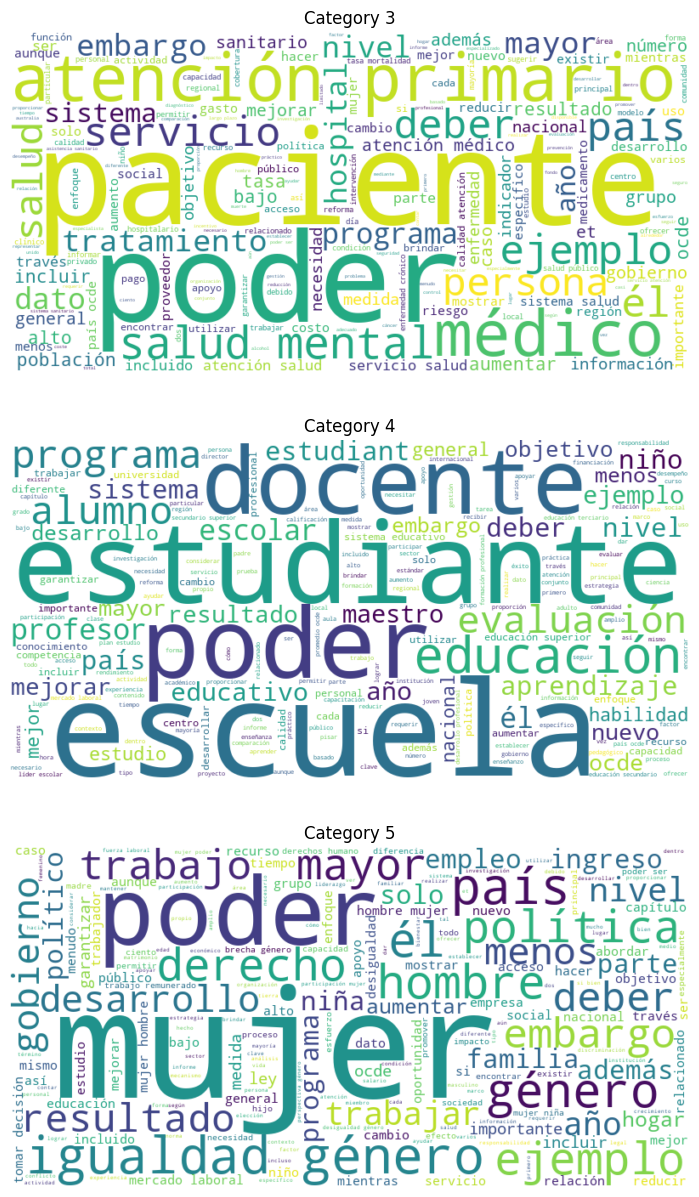

In [ ]:
df_cat_3 = df_limpieza[df_limpieza['sdg'] == 3]
# cat 4
df_cat_4 = df_limpieza[df_limpieza['sdg'] == 4]
# cat 5
df_cat_5 = df_limpieza[df_limpieza['sdg'] == 5]

fig, ax = plt.subplots(3, 1, figsize=(10, 15))

def plot_word_cloud_by_cat(df, ax, category, index):
    text = df['final_text'].str.cat(sep=' ')
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    ax[index].imshow(wordcloud, interpolation='bilinear')
    ax[index].axis('off')
    ax[index].set_title(f'Category {category}')

plot_word_cloud_by_cat(df_cat_3, ax, 3, 0)
plot_word_cloud_by_cat(df_cat_4, ax, 4, 1)
plot_word_cloud_by_cat(df_cat_5, ax, 5, 2)


plt.show()

In [ ]:
X = pd.DataFrame(X_count.toarray(), columns=count.get_feature_names_out())
X['texto_original'] = df_limpieza['Textos_espanol']

In [ ]:
for p in X.columns:
    print(p)

aalto
aaltonar
aarkrog
aarrevaaro
abajo
abanderado
abandonado
abandonar
abandono
abanico
abarcada
abarcar
abbas
abbasian
abbott
abc
abdullah
abiertamente
abierto
abitur
abiyán
abogada
abogado
abogar
abolición
abolido
abolir
abonado
abordada
abordado
abordaje
abordar
abordarla
abordarlos
aborigen
abortir
aborto
aborígenes
aborígén
abouchaar
about
abp
abreviadamente
abriac
abril
abrir
abrumado
abrumador
abruptamente
abrupto
absentismo
absoluto
absolutos
absorber
absorción
absorr
abstemio
abstener
abstracto
abu
abuela
abuelos
abuja
aburrido
aburrimiento
abusada
abusado
abusador
abusar
abusivo
abuso
abyecto
acabar
academia
académicamente
académico
académique
acamo
acar
acaro
acarrear
acceder
accedido
accenture
accesibilidad
accesibl
accesible
acceso
access
accident
accidental
accidente
accionista
acción
accra
accrott
ace
acecho
aceitero
aceleración
acelerar
acemoglu
acentuado
acentuar
aceptabilidad
aceptable
aceptación
aceptado
aceptar
acerca
acercar
acertadamente
acertado
achacar
achievem

# Entrenamiento de un Decision Tree

In [ ]:
# Import a decision tree
# Split the data into a training and a test set
from pandas import DataFrame


training_data = X
training_data['category'] = y_data

y = training_data['category']

X_train, X_test, y_train, y_test = train_test_split(training_data.drop(['category'], axis=1), y, test_size=0.2, 
random_state=42)

X_train_texto_original = DataFrame(X_train['texto_original'], columns=['texto_original'])
X_test_texto_original = DataFrame(X_test['texto_original'], columns=['texto_original'])

X_train = X_train.drop(['texto_original'], axis=1)
X_test = X_test.drop(['texto_original'], axis=1)

# Create the decision tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict the test set
y_pred_test = clf.predict(X_test)

In [ ]:
# Calculate the accuracy
accuracy_score(y_test, y_pred_test)

0.9444444444444444

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           3       0.92      0.96      0.94       250
           4       0.96      0.94      0.95       268
           5       0.95      0.94      0.95       292

    accuracy                           0.94       810
   macro avg       0.94      0.94      0.94       810
weighted avg       0.95      0.94      0.94       810



# Entrenamiento de un Random Forest

In [ ]:
# Import a random forest

# Create the random forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predict the test set
y_pred_test = rf_clf.predict(X_test)

## Training set evaluation

In [ ]:
# Evaluate with the training set
y_pred_train = rf_clf.predict(X_train)

# Calculate the accuracy
accuracy_score(y_train, y_pred_train)

print(classification_report(y_train, y_pred_train))


              precision    recall  f1-score   support

           3       1.00      1.00      1.00       994
           4       1.00      1.00      1.00      1086
           5       1.00      1.00      1.00      1159

    accuracy                           1.00      3239
   macro avg       1.00      1.00      1.00      3239
weighted avg       1.00      1.00      1.00      3239



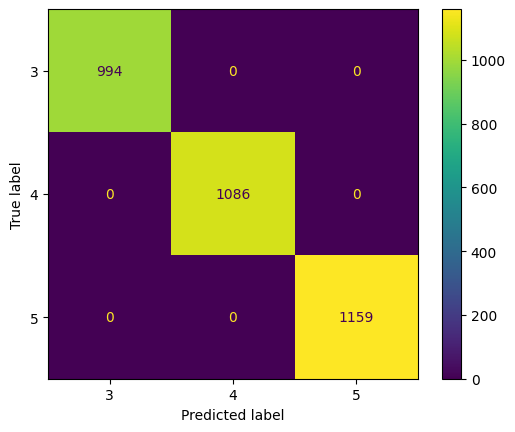

In [ ]:
# Plot confussion matrix
cm = confusion_matrix(y_train, y_pred_train, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [ ]:
X_train_texto_original['category'] = y_train
X_train_texto_original['prediction'] = y_pred_train
X_train_texto_original['correct'] = X_train_texto_original['category'] == X_train_texto_original['prediction']
X_train_texto_original[X_train_texto_original['correct'] == False]

,texto_original,category,prediction,correct


## Test set Evaluation

In [ ]:
# Calculate the accuracy
print(accuracy_score(y_test, y_pred_test))

print(classification_report(y_test, y_pred_test))

0.9765432098765432
              precision    recall  f1-score   support

           3       0.98      0.99      0.98       250
           4       0.97      0.98      0.97       268
           5       0.98      0.97      0.97       292

    accuracy                           0.98       810
   macro avg       0.98      0.98      0.98       810
weighted avg       0.98      0.98      0.98       810



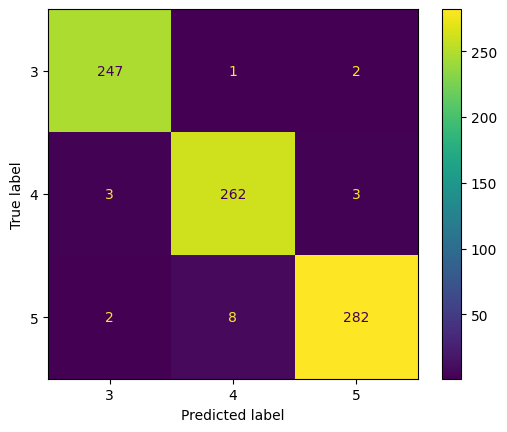

In [ ]:
# Plot me a confusion matrix

cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [ ]:
pd.set_option('display.max_colwidth', None)
X_test_texto_original['category'] = y_test
X_test_texto_original['prediction'] = y_pred_test
X_test_texto_original['correct'] = X_test_texto_original['category'] == X_test_texto_original['prediction']
X_test_texto_original[X_test_texto_original['correct'] == False].to_csv('failed_predictions.csv', index=True)
X_test_texto_original[X_test_texto_original['correct'] == False]

,texto_original,category,prediction,correct
1042,"Los ingresos de los graduados con educación terciaria son más altos que los de aquellos con niveles más bajos de calificación. Sin embargo, los ingresos de los hombres con educación terciaria son más altos, en promedio, que los de las mujeres con educación terciaria. De media en los países de la UE22, las mujeres con educación terciaria ganan un 26 % menos que sus homólogos masculinos.",4,5,False
1075,"Uno de los mayores obstáculos a los que se enfrentan los inmigrantes a la hora de buscar trabajo es que sus cualificaciones y experiencia laboral en el extranjero pueden no estar plenamente reconocidas en el país de acogida. Como consecuencia, muchos trabajadores inmigrantes ocupan puestos para los que están sobrecualificados. Por término medio, los hombres obtienen puntuaciones más altas que las mujeres en las escalas de aritmética y resolución de problemas en entornos tecnológicos, pero la diferencia no es grande y se reduce aún más cuando se tienen en cuenta otras características, como el nivel de estudios y el estatus socioeconómico. En alfabetización, la diferencia de competencia a favor de los hombres es aún menor.",4,5,False
3186,"Las políticas para promover un entorno escolar ""favorable a las niñas"", como la contratación de más maestras, también han demostrado tener un impacto positivo en la asistencia de las niñas. La evaluación de un programa aleatorio en la India reveló que la contratación de más maestras aumentaba la asistencia de las niñas en un 50% (Glewwe y Kremer, 2006). Esto es especialmente cierto en las zonas rurales y en el caso de las niñas casadas.",5,4,False
2216,"Este tema también ha sido destacado por la Red sobre Igualdad de Género del Comité de Asistencia para el Desarrollo (CAD) de la OCDE, en referencia a las cuestiones de género consagradas en la Declaración de París sobre la Eficacia de la Ayuda al Desarrollo de 2005 y la Agenda de Acción de Accra de 2008 (OCDE, 2008b). Un estudio sobre las diferencias de género en el desempeño de los estudiantes a los 15 años ha presentado evidencia de las diferentes formas en que los niños y las niñas aprenden y progresan en la educación (OCDE, 2009a) y un estudio sobre la equidad en la educación ha analizado las políticas para mejorar el desempeño de los estudiantes de diferentes grupos Por lo tanto, es relevante estudiar cómo las instalaciones educativas pueden atender las diferencias de género para mejorar el rendimiento.",5,4,False
2658,"Los maestros, administradores y estudiantes pueden informar que no existe disparidad de género en su escuela o universidad, pero esto se debe a que rara vez cuestionamos estas normas en nuestra vida diaria. Y es solo viendo y reconociendo estas normas que se puede lograr el cambio. Por lo tanto, es útil considerar la diferenciación social en cualquier modelo de planificación, en lugar de centrarse únicamente en las diferencias de género (Becker, 2009). Aunque Turquía exige 8 años de educación obligatoria, esta política no ha aumentado la participación femenina en esta región.",5,4,False
1764,"International Handbook on the Preparation and Development of School Leaders, Routledge, Nueva York, Londres, pp. Teacher and Leader Effectiveness in High-Performing Education Systems, Alliance for Excellent Education, Washington DC, Stanford Center for Opportunity Policy in Education, Stanford, California. Evidence from Michigan school districtsâ€, Leadership and Policy in Schools, Vol. La información fue suministrada por los paÃses a través de un cuestionario desarrollado especÃficamente por la Revisión de la OCDE.",4,3,False
2736,"Los gobiernos africanos deben abordar el desafío de mapear, tanto como sea posible, todas las instalaciones de educación primaria e identificar a todos los niños en edad escolar, incluido el seguimiento de los niños que no asisten a la escuela. Si bien las mejoras en los marcos legales e institucionales y las prioridades políticas más altas pueden respaldar 

# Construcción de pipeline de predicción

In [34]:
# Construct a pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

# Pasos del pipeline
# 1. Strip
# 2. Fix encoding
# 3. Tokenize
# 4. Preprocessing
# 5. Lemmatize
# 6. Concatenate words
# 7. Count Vectorizer
# 8. Random Forest Classifier

# 1. Strip
def strip_text(X):
    return X.str.strip()

# 2. Fix encoding
def replace(text):
    replacements = {
        'Ã¡': 'á',
        'Ã©': 'é',
        'Ã­': 'í',
        'Ã³': 'ó',
        'Ãº': 'ú',
        'Ã±': 'ñ'
    }
    for wrong, correct in replacements.items():
        text = text.replace(wrong, correct)
    return text

def fix_encoding_array(X):
    return X.apply(replace)

# 3. Tokenize
def word_tokenize_spanish(text):
    return word_tokenize(text, language='spanish')

def word_tokenize_spanish_array(X):
    X = X.apply(word_tokenize_spanish)
    return X

# 4. Preprocessing
def to_lower(words: list[str]):
    return [word.lower() for word in words]

def remove_punctuation(words: list[str]):
    return [word for word in words if word.isalpha()]

def remove_stopwords(words: list[str]):
    stopwords = set(nltk.corpus.stopwords.words('spanish'))
    return [word for word in words if word not in stopwords]

def preprocessing(words: list[str]):
    words = to_lower(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    return words

def preprocessing_array(X):
    return X.apply(preprocessing)

# 5. Lemmatize
# Load the large spanish model

def lemmatize(words, nlp):
    text = ' '.join(words)
    doc = nlp(text)
    return [token.lemma_ for token in doc]

def lemmatize_array(X):
    nlp = spacy.load("es_core_news_lg")
    return X.apply(lemmatize, nlp=nlp)

# 6. Concatenate words
def concat_words(words):
    return ' '.join(map(str, words))

def concat_words_array(X):
    return X.apply(concat_words)

# 7. Count Vectorizer
# def vectorize(X):
#     count = CountVectorizer()
#     X_count = count.fit_transform(X)
#     X_count = pd.DataFrame(X_count.toarray(), columns=count.get_feature_names_out())
#     return X_count

preprocessing_pipeline = Pipeline([
    ('strip', FunctionTransformer(strip_text)),
    ('fix_encoding', FunctionTransformer(fix_encoding_array)),
    ('tokenize', FunctionTransformer(word_tokenize_spanish_array)),
    ('preprocessing', FunctionTransformer(preprocessing_array)),
    ('lemmatize', FunctionTransformer(lemmatize_array))
])

vectorization_clf_pipeline = Pipeline([
    ('concat', FunctionTransformer(concat_words_array)),
    ('b_o_w', CountVectorizer()),
    ('clf', RandomForestClassifier(random_state=42))
])

pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('vectorization_clf', vectorization_clf_pipeline)
])

# Prueba de pipeline con train-test split

In [5]:
df_original = pd.read_excel('../Datasets/ODScat_345.xlsx')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    df_original["Textos_espanol"], df_original["sdg"], test_size=0.2, random_state=42
)
y_pred_test = pipeline.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

0.9728395061728395
              precision    recall  f1-score   support

           3       0.98      0.98      0.98       250
           4       0.96      0.97      0.97       268
           5       0.97      0.96      0.97       292

    accuracy                           0.97       810
   macro avg       0.97      0.97      0.97       810
weighted avg       0.97      0.97      0.97       810



In [ ]:
importancia = pipeline.named_steps['preprocessing'].named_steps['clf'].feature_importances_
features = pipeline.named_steps['preprocessing'].named_steps['b_o_w'].get_feature_names_out()
importancia_atributo = pd.DataFrame(data={"Atributo": features,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)

# Prueba de pipeline con CV y gridsearch

## Búsqueda de hiperparámetros

In [37]:
from sklearn.model_selection import cross_val_score
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

# Perform cross validation
X = df_original["Textos_espanol"]
X = preprocessing_pipeline.transform(X)
y = df_original["sdg"]
scores = cross_val_score(vectorization_clf_pipeline, X, y, cv=particiones)

In [38]:
scores

array([0.98024691, 0.97777778, 0.96790123, 0.9654321 , 0.97283951,
       0.98271605, 0.96296296, 0.97777778, 0.97283951, 0.97524752])

## Extracción de palabras más importantes

In [24]:

# get n rows so that the sum of the importance is greater than 0.8
n = 0
sum_importance = 0
while sum_importance < 0.8:
    sum_importance += importancia_atributo['Importancia'][n]
    n += 1

print(importancia_atributo.head(n)['Importancia'].sum())
most_important_words = importancia_atributo.head(n)['Atributo'].values
print(most_important_words)

0.800018785359158
['mujer' 'género' 'salud' 'escuela' 'educación' 'aprendizaje' 'hombre'
 'atención' 'paciente' 'igualdad' 'médico' 'estudiante' 'escolar'
 'enfermedad' 'alumno' 'docente' 'sanitario' 'estudiant' 'educativo'
 'femenino' 'superior' 'profesor' 'mental' 'mortalidad' 'hospital'
 'tratamiento' 'servicio' 'formación' 'evaluación' 'violencia' 'sistema'
 'niña' 'derechos' 'maestro' 'rendimiento' 'secundario' 'habilidad'
 'hospitalario' 'consumo' 'trabajo' 'remunerado' 'masculino' 'enseñanza'
 'derecho' 'primario' 'pisar' 'muerte' 'discriminación' 'medicamento'
 'población' 'alcohol' 'económico' 'enseñanzo' 'doméstico' 'matrimonio'
 'persona' 'clínico' 'empresaria' 'empleo' 'director' 'brecha'
 'profesional' 'competencia' 'aula' 'calidad' 'terciario' 'farmacéutico'
 'ambulatorio' 'laboral' 'niño' 'sexual' 'desigualdad' 'programa'
 'académico' 'cáncer' 'gasto' 'riesgo' 'crónico' 'pedagógico' 'curso'
 'hombr' 'hijo' 'pago' 'política' 'sociedad' 'cuidado' 'empresa' 'año'
 'universi

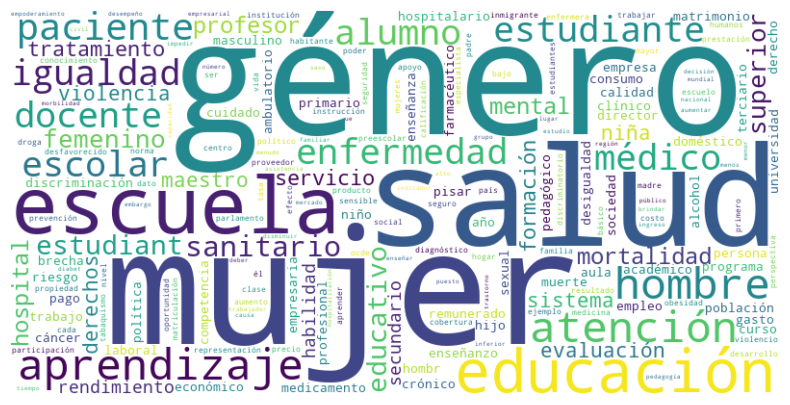

In [26]:
# make a wordcloud
# text = ' '.join(most_important_words)
word_freq = Counter()
total_words = len(most_important_words)
for position, word in enumerate(most_important_words):
    weight = total_words - position  # Higher weight for earlier positions
    word_freq[word] += weight
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Prueba de pipeline con dataset de prueba final

In [8]:
df_original = pd.read_excel('C:/Users/danie/Projects/BI_PROY1_2402/Proyecto 1/Etapa 1/Datasets/ODScat_345.xlsx')
X_data = df_original['Textos_espanol']
y_data = df_original['sdg']

In [9]:
X_data = df_original['Textos_espanol']
y_full = df_original['sdg']
y_pred_full = pipeline.fit(X_data, y_full).predict(X_data)

KeyboardInterrupt: 

In [ ]:
# evaluate results
print(accuracy_score(y_full, y_pred_full))
print(classification_report(y_full, y_pred_full))

1.0
              precision    recall  f1-score   support

           3       1.00      1.00      1.00      1244
           4       1.00      1.00      1.00      1354
           5       1.00      1.00      1.00      1451

    accuracy                           1.00      4049
   macro avg       1.00      1.00      1.00      4049
weighted avg       1.00      1.00      1.00      4049



In [ ]:
df_test_original = pd.read_excel('C:/Users/danie/Projects/BI_PROY1_2402/Proyecto 1/Etapa 1/Datasets/TestODScat_345.xlsx')

In [ ]:
X_test = df_test_original['Textos_espanol']
y_pred_test = pipeline.predict(X_test)

In [ ]:
df_test_original['sdg'] = y_pred_test
df_test_original.to_excel('./output.xlsx', index=False)
df_test_original.to_csv('./output.csv', index=False)

# Serializar modelo

In [ ]:
# Serialize model
joblib.dump(pipeline, 'pipeline.joblib')

['pipeline.joblib']